**O que esperamos:**

▪Gostaríamos  de  saber  quais  são  5  rotas  mais  pontuais  para  que  possamos recomendar  aos  nossos clientes;

▪Principais rotas por aeroporto;

▪Número de voos por Cia Aérea (Utilizar nome completo) ;

▪Plotar num mapa a visualização das rotas dos voos com saída de Guarulhos;

▪Média dosatrasosdos voos em minutos por Cia Aérea (usar box blot);

▪Quais os dias da semana com maior frequência de atraso por Cia Área;

▪Um Dash Bônus, utilizar a sua experiência em análise de dados e trazer informações relevantes com os dados obtidos.

▪Que você utilize alguma ferramenta de BI, para demonstrar graficamente os dados

# Importando bibliotecas e verificando Dataset

In [1]:
#Incialmente importando as bibliotecas que acho necessárias
import pandas as pd
import numpy as np 
import re
import datetime as dt
import calendar
import matplotlib.pyplot as plt

In [2]:
#lendo o dataset 

df= pd.read_csv('C:/Users/User/Desktop/Case Intelipost/BrFlights2.csv',encoding = 'latin1' )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [4]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [5]:
#padronizando nomes das colunas

df.columns = [cols.lower().replace('.','_').strip() for cols in df.columns]

In [6]:
#optando por trabalhar somente com voos Nacionais

df1 = df.query('codigo_tipo_linha == "Nacional"').reset_index(drop = True)

In [7]:
#renomeando nomes das empresas aereas


comp = {'AZUL':'Azul Linhas Aereas Brasileiras S.A.','GOL':'Gol Linhas Aereas','TAM':'LATAM Airlines Brasil','TOTAL':'Total Linhas Aereas','FLYWAYS':'FlyWays Linhas Aereas','MAP LINHAS AEREAS': 'Map Linhas aereas', 'AVIANCA BRASIL': 'Avianca Airlines'}
df1['companhia_aerea'] = df1['companhia_aerea'].map(comp)
df1.head()

,voos,companhia_aerea,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,aeroporto_origem,...,estado_origem,pais_origem,aeroporto_destino,cidade_destino,estado_destino,pais_destino,longdest,latdest,longorig,latorig
0,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-05T08:25:00Z,2016-01-05T10:52:00Z,2016-01-05T09:32:00Z,2016-01-05T11:40:00Z,Realizado,TROCA DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
1,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-07T08:25:00Z,2016-01-07T08:09:00Z,2016-01-07T09:32:00Z,2016-01-07T09:12:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
2,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-04T08:25:00Z,2016-01-04T08:31:00Z,2016-01-04T09:32:00Z,2016-01-04T09:25:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
3,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-06T08:25:00Z,2016-01-06T08:17:00Z,2016-01-06T09:32:00Z,2016-01-06T09:16:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
4,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-08T08:25:00Z,2016-01-08T08:15:00Z,2016-01-08T09:32:00Z,2016-01-08T09:12:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553


# Gostaríamos de saber quais são 5 rotas mais pontuais para que possamos recomendar aos nossos clientes

In [8]:
#usando datetime para correção dos horários
df1['partida_prevista'] = pd.to_datetime(df1['partida_prevista'])
df1['partida_real'] = pd.to_datetime(df1['partida_real'])
df1['chegada_prevista'] = pd.to_datetime(df1['chegada_prevista'])
df1['chegada_real'] = pd.to_datetime(df1['chegada_real'])

In [ ]:
#def função para converter hora em minutos

def convert_to_minutes(x):
    return x.total_seconds() / 60

In [91]:
#verificando os atrasos e definindo em uma nova coluna no dataframe

df1['atraso_de_partida'] = (df1['partida_real'] - df1['partida_prevista']).apply(convert_to_minutes)
df1['atraso_de_chegada'] = (df1['chegada_real'] - df1['chegada_prevista']).apply(convert_to_minutes)
df1['total_atraso'] = ((df1['partida_real'] - df1['partida_prevista']).apply(convert_to_minutes)) + ((df1['chegada_real'] - df1['chegada_prevista']).apply(convert_to_minutes))

In [104]:
rotas_pont = df1.query('atraso_de_partida == 0 ')

In [120]:
rotas1 = rotas_pont[['aeroporto_origem' ,'rotas','atraso_de_partida']]

In [121]:
rotas1.value_counts().head()

aeroporto_origem                             rotas                     atraso_de_partida
Congonhas                                    Sao Paulo-Rio De Janeiro  0.0                  17509
Presidente Juscelino Kubitschek              Brasilia-Rio De Janeiro   0.0                  15092
Guarulhos - Governador Andre Franco Montoro  Guarulhos-Salvador        0.0                  11727
Deputado Luis Eduardo Magalhaes              Salvador-Guarulhos        0.0                  11368
Guarulhos - Governador Andre Franco Montoro  Guarulhos-Rio De Janeiro  0.0                  11365
dtype: int64

# Principais rotas por aeroporto


* *Optei por trabalhar com Voos Nacionais*

In [9]:
#criando uma coluna com o ano para separar quantidade de voos por ano

df1['ano'] = df1['partida_prevista'].apply(lambda x: x.year)

df1.head()

,voos,companhia_aerea,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,aeroporto_origem,...,pais_origem,aeroporto_destino,cidade_destino,estado_destino,pais_destino,longdest,latdest,longorig,latorig,ano
0,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-05 08:25:00+00:00,2016-01-05 10:52:00+00:00,2016-01-05 09:32:00+00:00,2016-01-05 11:40:00+00:00,Realizado,TROCA DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
1,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-07 08:25:00+00:00,2016-01-07 08:09:00+00:00,2016-01-07 09:32:00+00:00,2016-01-07 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
2,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-04 08:25:00+00:00,2016-01-04 08:31:00+00:00,2016-01-04 09:32:00+00:00,2016-01-04 09:25:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
3,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-06 08:25:00+00:00,2016-01-06 08:17:00+00:00,2016-01-06 09:32:00+00:00,2016-01-06 09:16:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
4,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-08 08:25:00+00:00,2016-01-08 08:15:00+00:00,2016-01-08 09:32:00+00:00,2016-01-08 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016


## *Criando uma coluna para visualizar melhor as rotas*

In [10]:
#criando coluna com rotas

df1 = df1.assign(rotas = df1['cidade_origem'] +'-'+ df1['cidade_destino'])
rotas = df1[['aeroporto_origem','rotas']].value_counts().to_frame().reset_index().rename(columns = {0:'total'})

## *Verificando os aeroportos com maior quantidade de voos*

In [11]:
rotas

,aeroporto_origem,rotas,total
0,Congonhas,Sao Paulo-Rio De Janeiro,24560
1,Viracopos,Campinas-Rio De Janeiro,21411
2,Presidente Juscelino Kubitschek,Brasilia-Rio De Janeiro,21269
3,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Rio De Janeiro,20105
4,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Salvador,18321
...,...,...,...
894,Presidente Juscelino Kubitschek,Brasilia-Londrina,2
895,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Bonito,1
896,Trombetas,Oriximina-Altamira,1
897,Presidente Juscelino Kubitschek,Brasilia-Araguaina,1


## *Verificando quantidade de viagens por ano*

In [12]:
df1[['aeroporto_origem','rotas','ano','estado_origem']].value_counts().to_frame().rename(columns = {0 : 'total'}).reset_index()

,aeroporto_origem,rotas,ano,estado_origem,total
0,Viracopos,Campinas-Rio De Janeiro,2015,SP,10366
1,Congonhas,Sao Paulo-Rio De Janeiro,2016,SP,10126
2,Presidente Juscelino Kubitschek,Brasilia-Rio De Janeiro,2015,DF,10087
3,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Rio De Janeiro,2015,SP,9710
4,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Salvador,2015,SP,8828
...,...,...,...,...,...
2218,Eduardo Gomes,Manaus-Manicore,2015,AM,1
2219,Eduardo Gomes,Manaus-Oriximina,2016,AM,1
2220,Carauari,Carauari-Coari,2016,AM,1
2221,Val De Cans,Belem-Tucurui,2016,PA,1


*Verificando os numero de voos por ano*

In [13]:
df1[['companhia_aerea','ano']].value_counts().to_frame().rename(columns = {0 : 'total'}).reset_index().sort_values('companhia_aerea',ascending= True)

,companhia_aerea,ano,total
9,Avianca Airlines,2016,70532
11,Avianca Airlines,2017,45680
10,Avianca Airlines,2015,67167
1,Azul Linhas Aereas Brasileiras S.A.,2015,231859
2,Azul Linhas Aereas Brasileiras S.A.,2016,227547
6,Azul Linhas Aereas Brasileiras S.A.,2017,126571
12,FlyWays Linhas Aereas,2016,1644
18,FlyWays Linhas Aereas,2017,362
0,Gol Linhas Aereas,2015,308616
7,Gol Linhas Aereas,2017,101227


*Ano de 2015* 


*Usando uma estimativa com mais de 3500 viagens para mostragem*

In [14]:
df2 = df1[['companhia_aerea','estado_origem','aeroporto_origem','rotas','ano']]
df15 = df2.query('ano == 2015').value_counts().to_frame().reset_index().rename(columns = {0:'total'})
df15[df15['total'] > 3500].groupby(['companhia_aerea','ano']).sum()

,,total
companhia_aerea,ano,
Azul Linhas Aereas Brasileiras S.A.,2015,12374
Gol Linhas Aereas,2015,32579


*Ano de 2016* 

In [15]:
df2 = df1[['companhia_aerea','estado_origem','aeroporto_origem','rotas','ano']]
df16 = df2.query('ano == 2016').value_counts().to_frame().reset_index().rename(columns = {0:'total'})
df16[df16['total'] > 3500]

,companhia_aerea,estado_origem,aeroporto_origem,rotas,ano,total
0,Azul Linhas Aereas Brasileiras S.A.,SP,Viracopos,Campinas-Rio De Janeiro,2016,6678
1,Gol Linhas Aereas,SP,Congonhas,Sao Paulo-Rio De Janeiro,2016,6410
2,Azul Linhas Aereas Brasileiras S.A.,RJ,Santos Dumont,Rio De Janeiro-Campinas,2016,4682
3,Gol Linhas Aereas,RJ,Santos Dumont,Rio De Janeiro-Sao Paulo,2016,4459
4,Azul Linhas Aereas Brasileiras S.A.,SP,Viracopos,Campinas-Confins,2016,3725
5,Azul Linhas Aereas Brasileiras S.A.,MG,Tancredo Neves,Confins-Campinas,2016,3664


*Ano de 2017* 

In [16]:
df2 = df1[['companhia_aerea','estado_origem','aeroporto_origem','rotas','ano']]
df17 = df2.query('ano == 2017').value_counts().to_frame().reset_index().rename(columns = {0:'total'})
df17[df17['total'] > 3500]

,companhia_aerea,estado_origem,aeroporto_origem,rotas,ano,total
0,Gol Linhas Aereas,SP,Congonhas,Sao Paulo-Rio De Janeiro,2017,4485
1,Gol Linhas Aereas,RJ,Santos Dumont,Rio De Janeiro-Sao Paulo,2017,3743
2,Azul Linhas Aereas Brasileiras S.A.,SP,Viracopos,Campinas-Rio De Janeiro,2017,3582


# Número de voos por Cia aérea

*Apresentando quantidade de voos por ano e por Cia*

In [17]:
qtd_voos = df1[['companhia_aerea','situacao_voo','ano','codigo_justificativa','rotas']]

In [18]:
cancelado = qtd_voos.query('situacao_voo == "Cancelado"').value_counts().reset_index().rename(columns = {0:'total_cancelados'})
realizado = qtd_voos.query('situacao_voo == "Realizado"').value_counts().reset_index().rename(columns = {0:'total_realizados'})

## *Quantidade Voos Realizados*

In [19]:
realizado.head()

,companhia_aerea,situacao_voo,ano,codigo_justificativa,rotas,total_realizados
0,Azul Linhas Aereas Brasileiras S.A.,Realizado,2016,ANTECIPACAO DE HORARIO AUTORIZADA,Campinas-Rio De Janeiro,3792
1,Azul Linhas Aereas Brasileiras S.A.,Realizado,2016,ANTECIPACAO DE HORARIO AUTORIZADA,Rio De Janeiro-Campinas,3535
2,Azul Linhas Aereas Brasileiras S.A.,Realizado,2015,ANTECIPACAO DE HORARIO AUTORIZADA,Campinas-Rio De Janeiro,2601
3,Azul Linhas Aereas Brasileiras S.A.,Realizado,2015,ANTECIPACAO DE HORARIO AUTORIZADA,Rio De Janeiro-Campinas,2600
4,Azul Linhas Aereas Brasileiras S.A.,Realizado,2016,ANTECIPACAO DE HORARIO AUTORIZADA,Campinas-Confins,2193


In [20]:
realizado[['companhia_aerea','ano','total_realizados']].groupby(['companhia_aerea','ano']).sum()

total_realizados
companhia_aerea                     ano                   
Avianca Airlines                    2015             14184
                                    2016             12218
                                    2017              7355
Azul Linhas Aereas Brasileiras S.A. 2015            150473
                                    2016            181094
                                    2017             95026
FlyWays Linhas Aereas               2016               183
Gol Linhas Aereas                   2015             43972
                                    2016             40555
                                    2017             20525
LATAM Airlines Brasil               2015             31141
                                    2016             22797
                                    2017             13160
Map Linhas aereas                   2015               574
                                    2016              1612
                                    2017              1260
Total Linhas Aereas                 2015               326
                                    2016               545
                                    2017               412

## *Quantidade Voos Cancelados*

In [21]:
cancelado.head()

,companhia_aerea,situacao_voo,ano,codigo_justificativa,rotas,total_cancelados
0,Gol Linhas Aereas,Cancelado,2015,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Brasilia-Confins,1220
1,Gol Linhas Aereas,Cancelado,2015,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Guarulhos-Salvador,1184
2,Gol Linhas Aereas,Cancelado,2015,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Porto Seguro-Guarulhos,1016
3,Gol Linhas Aereas,Cancelado,2015,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Confins-Brasilia,971
4,Gol Linhas Aereas,Cancelado,2015,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Goiania-Brasilia,867


In [22]:
cancelado[['companhia_aerea','ano','total_cancelados']].groupby(['companhia_aerea','ano']).sum()

total_cancelados
companhia_aerea                     ano                   
Avianca Airlines                    2015              2139
                                    2016              2337
                                    2017              1519
Azul Linhas Aereas Brasileiras S.A. 2015             20576
                                    2016             17781
                                    2017             11077
FlyWays Linhas Aereas               2016               473
Gol Linhas Aereas                   2015             55624
                                    2016             29965
                                    2017              1193
LATAM Airlines Brasil               2015             14558
                                    2016             10639
                                    2017              5204
Map Linhas aereas                   2015                16
Total Linhas Aereas                 2015                 2
                                    2016                14

*Funcao criada caso queira visualizar com mais facilidade os voos por ano *

In [23]:
def comp(dataframe,coluna,string):
    return dataframe[dataframe[coluna] == string]

In [24]:
comp(cancelado,'companhia_aerea', 'Azul Linhas Aereas Brasileiras S.A.').head()

,companhia_aerea,situacao_voo,ano,codigo_justificativa,rotas,total_cancelados
5,Azul Linhas Aereas Brasileiras S.A.,Cancelado,2016,AUTORIZADO,Campinas-Rio De Janeiro,839
8,Azul Linhas Aereas Brasileiras S.A.,Cancelado,2016,AUTORIZADO,Rio De Janeiro-Campinas,757
32,Azul Linhas Aereas Brasileiras S.A.,Cancelado,2017,AUTORIZADO,Campinas-Rio De Janeiro,492
35,Azul Linhas Aereas Brasileiras S.A.,Cancelado,2015,AUTORIZADO,Rio De Janeiro-Campinas,483
38,Azul Linhas Aereas Brasileiras S.A.,Cancelado,2017,AUTORIZADO,Rio De Janeiro-Campinas,453


# Plotar num mapa a visualização das rotas dos voos com saída de Guarulhos

# Média dos atrasos dos voos em minutos por Cia Aérea (usar box blot)

In [28]:
atraso_media = df1[['companhia_aerea','atraso_de_partida','atraso_de_chegada', 'total_atraso']]

In [29]:
atraso_media.groupby(['companhia_aerea']).mean()

,atraso_de_partida,atraso_de_chegada,total_atraso
companhia_aerea,,,
Avianca Airlines,3.876184,4.095381,7.971565
Azul Linhas Aereas Brasileiras S.A.,-3.564208,-4.105965,-7.670174
FlyWays Linhas Aereas,3.702544,4.461840,8.164384
Gol Linhas Aereas,2.501031,3.965201,6.466232
LATAM Airlines Brasil,3.223899,3.228330,6.452229
Map Linhas aereas,-57.629460,-59.844705,-117.474165
Total Linhas Aereas,60.117375,42.471815,102.589189


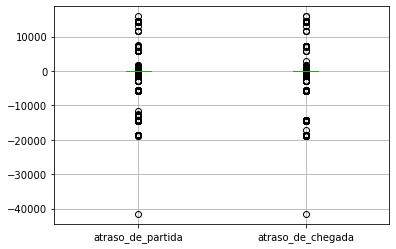

In [30]:
atraso_media.boxplot(['atraso_de_partida','atraso_de_chegada'])
plt.show()

***em negativo, o voo foi adiantado***

# Quais os dias da semana com maior frequência de atraso por Cia Área;

## *Adicionando Dias da semana no DataFrame*

In [31]:
df1 = df1.assign(dia_semana = df1['partida_prevista'].apply(lambda x: x.day_name()))
dias = {'Monday':'Segunda-Feira','Tuesday':'Terca-Feira','Wednesday':'Quarta-Feira','Thursday':'Quinta-Feira','Friday':'Sexta-Feira','Saturday':'Sabado','Sunday':'Domingo'}
test= df1['dia_semana']
df1['dia_semana'] = test.map(dias)

In [58]:
atraso_dia0 = df1[['atraso_de_partida','total_atraso','dia_semana','situacao_voo', 'companhia_aerea','ano']]

In [59]:
atraso_dia = atraso_dia0.query('atraso_de_partida >= 0')

In [68]:
atraso_dia.groupby(['dia_semana']).sum().drop('ano', axis = 1)

,atraso_de_partida,total_atraso
dia_semana,,
Domingo,1132899.0,2058847.0
Quarta-Feira,1404843.0,2766927.0
Quinta-Feira,1600883.0,3186867.0
Sabado,904007.0,1737301.0
Segunda-Feira,6671676.0,13314138.0
Sexta-Feira,2456574.0,4138862.0
Terca-Feira,4087784.0,8125048.0


In [61]:
 soma_atraso = atraso_dia.groupby(['companhia_aerea','dia_semana']).sum().drop('ano', axis=1)

In [62]:
print('Os números negativos apresentados significa os voos adiantados')
soma_atraso

Os números negativos apresentados significa os voos adiantados


atraso_de_partida  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 150165.0   
                                    Quarta-Feira            190582.0   
                                    Quinta-Feira            203110.0   
                                    Sabado                  154557.0   
                                    Segunda-Feira           475383.0   
                                    Sexta-Feira             597980.0   
                                    Terca-Feira             317091.0   
Azul Linhas Aereas Brasileiras S.A. Domingo                 331785.0   
                                    Quarta-Feira            570514.0   
                                    Quinta-Feira            559767.0   
                                    Sabado                  290342.0   
                                    Segunda-Feira          4492326.0   
                                    Sexta-Feira             564429.0   
                                    Terca-Feira            2671873.0   
FlyWays Linhas Aereas               Quarta-Feira               771.0   
                                    Quinta-Feira               835.0   
                                    Segunda-Feira             1590.0   
                                    Sexta-Feira               2664.0   
                                    Terca-Feira                168.0   
Gol Linhas Aereas                   Domingo                 275038.0   
                                    Quarta-Feira            355999.0   
                                    Quinta-Feira            504317.0   
                                    Sabado                  257346.0   
                                    Segunda-Feira          1044195.0   
                                    Sexta-Feira             593304.0   
                                    Terca-Feira             632448.0   
LATAM Airlines Brasil               Domingo                 366631.0   
                                    Quarta-Feira            258419.0   
                                    Quinta-Feira            306542.0   
                                    Sabado                  186453.0   
                                    Segunda-Feira           619955.0   
                                    Sexta-Feira             656124.0   
                                    Terca-Feira             449549.0   
Map Linhas aereas                   Domingo                   9280.0   
                                    Quarta-Feira             13364.0   
                                    Quinta-Feira              9252.0   
                                    Sabado                   10082.0   
                                    Segunda-Feira             6952.0   
                                    Sexta-Feira              14805.0   
                                    Terca-Feira               5851.0   
Total Linhas Aereas                 Quarta-Feira             15194.0   
                                    Quinta-Feira             17060.0   
                                    Sabado                    5227.0   
                                    Segunda-Feira            31275.0   
                                    Sexta-Feira              27268.0   
                                    Terca-Feira              10804.0   

                                                   total_atraso  
companhia_aerea                     dia_semana                   
Avianca Airlines                    Domingo            300843.0  
                                    Quarta-Feira       386253.0  
                                    Quinta-Feira       413633.0  
                                    Sabado             298668.0  
                                    Segunda-Feira      955286.0  
                                    Sexta-Feira        841732.0  
                                    Terca-Feira        636682.0  


## *Tirando a média de atrasos por dia da semana*

In [66]:
atraso_dia.groupby('dia_semana').mean().drop('ano', axis = 1)

,atraso_de_partida,total_atraso
dia_semana,,
Domingo,7.041713,12.797090
Quarta-Feira,7.547198,14.864683
Quinta-Feira,8.265181,16.453441
Sabado,6.292684,12.093144
Segunda-Feira,33.990432,67.832027
Sexta-Feira,12.267168,20.667855
Terca-Feira,22.310430,44.345131


In [64]:
media_atraso = atraso_dia.groupby(['companhia_aerea','dia_semana']).mean().drop('ano', axis = 1)

In [65]:
print('Os números negativos apresentados significa os voos adiantados')
media_atraso

Os números negativos apresentados significa os voos adiantados


atraso_de_partida  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 6.553989   
                                    Quarta-Feira            7.796678   
                                    Quinta-Feira            8.310556   
                                    Sabado                  6.666537   
                                    Segunda-Feira          19.558257   
                                    Sexta-Feira            24.277536   
                                    Terca-Feira            13.102934   
Azul Linhas Aereas Brasileiras S.A. Domingo                11.790093   
                                    Quarta-Feira           16.119402   
                                    Quinta-Feira           15.078305   
                                    Sabado                 12.416799   
                                    Segunda-Feira         123.158406   
                                    Sexta-Feira            14.771375   
                                    Terca-Feira            75.987515   
FlyWays Linhas Aereas               Quarta-Feira            1.942065   
                                    Quinta-Feira            3.883721   
                                    Segunda-Feira           4.877301   
                                    Sexta-Feira             8.072727   
                                    Terca-Feira             0.714894   
Gol Linhas Aereas                   Domingo                 4.020259   
                                    Quarta-Feira            4.641992   
                                    Quinta-Feira            6.153734   
                                    Sabado                  4.256326   
                                    Segunda-Feira          12.554193   
                                    Sexta-Feira             7.002124   
                                    Terca-Feira             8.377793   
LATAM Airlines Brasil               Domingo                 8.910489   
                                    Quarta-Feira            5.305691   
                                    Quinta-Feira            6.174058   
                                    Sabado                  5.125997   
                                    Segunda-Feira          11.990697   
                                    Sexta-Feira            12.612918   
                                    Terca-Feira             9.395356   
Map Linhas aereas                   Domingo                34.117647   
                                    Quarta-Feira           39.421829   
                                    Quinta-Feira           57.825000   
                                    Sabado                 48.239234   
                                    Segunda-Feira          32.334884   
                                    Sexta-Feira            69.182243   
                                    Terca-Feira            37.748387   
Total Linhas Aereas                 Quarta-Feira           88.853801   
                                    Quinta-Feira          115.270270   
                                    Sabado                108.895833   
                                    Segunda-Feira         390.937500   
                                    Sexta-Feira           231.084746   
                                    Terca-Feira            81.848485   

                                                   total_atraso  
companhia_aerea                     dia_semana                   
Avianca Airlines                    Domingo           13.130368  
                                    Quarta-Feira      15.801546  
                                    Quinta-Feira      16.924427  
                                    Sabado            12.882505  
                                    Segunda-Feira     39.302477  
                                    Sexta-Feira       34.173684  
                                    Terca-Feira       26.309174  


*Criando variaveis com cada Cia aerea*

In [39]:
atrasos = df1[['total_atraso','dia_semana','situacao_voo', 'companhia_aerea', 'ano']]

In [40]:
azul = atrasos.query('companhia_aerea == "Azul Linhas Aereas Brasileiras S.A."').groupby(['ano','dia_semana']).mean()

gol = atrasos.query('companhia_aerea == "Gol Linhas Aereas"').groupby(['ano','dia_semana']).mean()

avianca = atrasos.query('companhia_aerea == "Avianca Airlines"').groupby(['ano','dia_semana']).mean()

map_aereo = atrasos.query('companhia_aerea == "Map Linhas aereas"').groupby(['ano','dia_semana']).mean()

tam = atrasos.query('companhia_aerea == "LATAM Airlines Brasil"').groupby(['ano','dia_semana']).mean()

total_aereo = atrasos.query('companhia_aerea == "Total Linhas Aereas"').groupby(['ano','dia_semana']).mean()

flyways = atrasos.query('companhia_aerea == "FlyWays Linhas Aereas"').groupby(['ano','dia_semana']).mean()

In [122]:
df1.to_csv('primeiro_case.csv', sep = '#')

# Um Dash Bônus, utilizar a sua experiência em análise de dados e trazer informações relevantes com os dados obtidos.

In [123]:
df1

,voos,companhia_aerea,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,aeroporto_origem,...,longdest,latdest,longorig,latorig,ano,rotas,atraso_de_partida,atraso_de_chegada,total_atraso,dia_semana
0,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-05 08:25:00+00:00,2016-01-05 10:52:00+00:00,2016-01-05 09:32:00+00:00,2016-01-05 11:40:00+00:00,Realizado,TROCA DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,-43.164876,-22.911144,-46.478126,-23.434553,2016,Guarulhos-Rio De Janeiro,147.0,128.0,275.0,Terca-Feira
1,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-07 08:25:00+00:00,2016-01-07 08:09:00+00:00,2016-01-07 09:32:00+00:00,2016-01-07 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,-43.164876,-22.911144,-46.478126,-23.434553,2016,Guarulhos-Rio De Janeiro,-16.0,-20.0,-36.0,Quinta-Feira
2,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-04 08:25:00+00:00,2016-01-04 08:31:00+00:00,2016-01-04 09:32:00+00:00,2016-01-04 09:25:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,-43.164876,-22.911144,-46.478126,-23.434553,2016,Guarulhos-Rio De Janeiro,6.0,-7.0,-1.0,Segunda-Feira
3,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-06 08:25:00+00:00,2016-01-06 08:17:00+00:00,2016-01-06 09:32:00+00:00,2016-01-06 09:16:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,-43.164876,-22.911144,-46.478126,-23.434553,2016,Guarulhos-Rio De Janeiro,-8.0,-16.0,-24.0,Quarta-Feira
4,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-08 08:25:00+00:00,2016-01-08 08:15:00+00:00,2016-01-08 09:32:00+00:00,2016-01-08 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,-43.164876,-22.911144,-46.478126,-23.434553,2016,Guarulhos-Rio De Janeiro,-10.0,-20.0,-30.0,Sexta-Feira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780314,TTL - 5683,Total Linhas Aereas,Nacional,2015-12-02 05:22:00+00:00,2015-12-02 05:37:00+00:00,2015-12-02 06:30:00+00:00,2015-12-02 06:34:00+00:00,Realizado,CONEXAO DE AERONAVE,Aeroporto Internacional Do Rio De Janeiro/Galeao,...,-40.283535,-20.257649,-43.249423,-22.813410,2015,Rio De Janeiro-Vitoria,15.0,4.0,19.0,Quarta-Feira
1780315,TTL - 5683,Total Linhas Aereas,Nacional,2015-12-31 03:32:00+00:00,2015-12-31 03:22:00+00:00,2015-12-31 04:30:00+00:00,2015-12-31 04:06:00+00:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Guarulhos - Governador Andre Franco Montoro,...,-43.249423,-22.813410,-46.478126,-23.434553,2015,Guarulhos-Rio De Janeiro,-10.0,-24.0,-34.0,Quinta-Feira
1780316,TTL - 5683,Total Linhas Aereas,Nacional,2015-12-03 05:22:00+00:00,2015-12-04 01:49:00+00:00,2015-12-03 06:30:00+00:00,2015-12-04 02:41:00+00:00,Realizado,AEROPORTO DESTINO ABAIXO DOS LIMITES,Aeroporto Internacional Do Rio De Janeiro/Galeao,...,-40.283535,-20.257649,-43.249423,-22.813410,2015,Rio De Janeiro-Vitoria,1227.0,1211.0,2438.0,Quinta-Feira
1780317,TTL - 5683,Total Linhas Aereas,Nacional,2015-12-24 05:22:00+00:00,2015-12-24 05:12:00+00:00,2015-12-24 06:30:00+00:00,2015-12-24 06:03:00+00:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Aeroporto Internacional Do Rio De Janeiro/Galeao,...,-40.283535,-20.257649,-43.249423,-22.813410,2015,Rio De Janeiro-Vitoria,-10.0,-27.0,-37.0,Quinta-Feira
